<a href="https://colab.research.google.com/github/AayushiWani/LY_Project_SLRSystem--KD_DL/blob/main/ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
from PIL import Image
import numpy as np
from glob import glob
from tqdm import tqdm
import albumentations as A
import cv2
from matplotlib import pyplot as plt

In [ ]:
# Define the path to your dataset in Google Drive
zip_file_path = '/content/drive/MyDrive/Asl_alphabet.zip'

print(f"Dataset zip file located at: {zip_file_path}")


Dataset zip file located at: /content/drive/MyDrive/Asl_alphabet.zip


In [ ]:
# Adding dataset to colab content/dataset path
import zipfile

# Define where you want to unzip the dataset
unzip_dir = '/content/ASL_alphabet/'

# Create unzip directory if it doesn't exist
import os
if not os.path.exists(unzip_dir):
    os.makedirs(unzip_dir)

print(f"Unzipping dataset from {zip_file_path} to {unzip_dir}...")

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Dataset successfully unzipped to: {unzip_dir}")


Unzipping dataset from /content/drive/MyDrive/Asl_alphabet.zip to /content/ASL_alphabet/...
Dataset successfully unzipped to: /content/ASL_alphabet/


In [ ]:
# Reading an image
image = cv2.imread('/content/ASL_alphabet/asl_alphabet_train/asl_alphabet_train/A/A6.jpg')


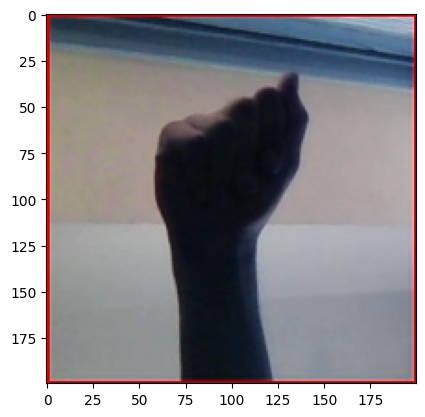

In [ ]:
# Displaying an image
plt.imshow(image)
plt.show()

In [ ]:
# PARAMETERS
N_BASE = 20      # Number of base images per character to sample
N_AUG = 50       # Number of augmentations per base image

TRAIN_SRC_DIR = '/content/ASL_alphabet/asl_alphabet_train/asl_alphabet_train'
DEST_DIR = '/content/ASL_alphabet_augmented/train'

os.makedirs(DEST_DIR, exist_ok=True)

# STRONG AUG PIPELINE
aug = A.Compose([
    A.RandomBrightnessContrast(p=0.8),
    A.HueSaturationValue(p=0.8),
    A.Rotate(limit=20, p=0.7, border_mode=cv2.BORDER_REFLECT),
    A.Affine(shear=(-12, 12), p=0.7),
    A.GaussNoise(p=0.5),
    A.Blur(blur_limit=5, p=0.3),
    A.RandomScale(scale_limit=0.2, p=0.7),
    A.SmallestMaxSize(max_size=224, p=1.0),
    A.PadIfNeeded(min_height=224, min_width=224, border_mode=cv2.BORDER_REFLECT, p=1.0),
    A.RandomCrop(height=224, width=224, p=0.5),
    A.Resize(224, 224),
    A.OneOf([
      A.CoarseDropout(max_holes=6, max_height=32, max_width=32, p=0.2),
      A.RandomShadow(p=0.2)], p=0.3)
], p=1.0)


random.seed(42)


/tmp/ipython-input-351292703.py:24: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=6, max_height=32, max_width=32, p=0.2),


In [ ]:

for class_name in sorted(os.listdir(TRAIN_SRC_DIR)):
    src_folder = os.path.join(TRAIN_SRC_DIR, class_name)
    dst_folder = os.path.join(DEST_DIR, class_name)
    os.makedirs(dst_folder, exist_ok=True)

    files = [f for f in os.listdir(src_folder) if f.lower().endswith('.jpg')]
    sample_files = random.sample(files, min(N_BASE, len(files)))  # in case there are fewer than N_BASE images

    for i, fname in enumerate(tqdm(sample_files, desc=f'Class {class_name}')):
        img_path = os.path.join(src_folder, fname)
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for j in range(N_AUG):
            augmented = aug(image=image_rgb)
            aug_img = augmented['image']
            out_fname = f'{class_name}_{i}_{j}.jpg'
            out_path = os.path.join(dst_folder, out_fname)
            cv2.imwrite(out_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

Class space: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]


In [ ]:
import shutil

# Path to the folder you want to zip
folder_path = '/content/ASL_alphabet_augmented'  # Change this to your folder path

# Path to save the zip file in Google Drive
zip_path = '/content/drive/MyDrive/ASL_alphabet_augmented.zip'  # Change this to your desired path in MyDrive

# Zip the folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

print(f"Folder zipped and saved to: {zip_path}")


Folder zipped and saved to: /content/drive/MyDrive/ASL_alphabet_augmented.zip
